# training and buiilding the Gender and age group classification model 

### **Step #1**: Import Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from shutil import copyfile
from scipy.stats import skew, kurtosis
########################################################
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
###########################################
# This is a simple keras or tensorflow.keras library import for CNN 
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Input,Dropout,BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2
# Use scikit-learn to grid search the batch size and epochs
import numpy as np
import keras
from keras_tuner import Hyperband
import keras_tuner as kt
from kerastuner import Objective
from keras.optimizers import Adam
##################################################
from imblearn.under_sampling import RandomUnderSampler
from keras.callbacks import Callback
####################################
from tqdm.notebook import tqdm


# This is a simple keras library import for CNN 
print("cv2_version:",cv2.__version__)

C:\Users\Sharaz Javed\AppData\Local\Temp\ipykernel_11652\4043203229.py:22: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import Objective


cv2_version: 4.9.0


In [2]:
#saveMLmodelfile_name="MLarch#04_genderAge_modelep25"
%store -r saveMLmodelfile_name
print("modelname:", saveMLmodelfile_name)
%store -r project_path
print("project_path:", project_path)
%store -r result_filepath
print("result_filepath:", result_filepath)


#figure_dirPath='./model/'+str(saveMLmodelfile_name)+"/"+"/figure/"
# Ensure the train and test directories exist
#os.makedirs(figure_dirPath, exist_ok=True)

modelname: exp01_genderAge_model
project_path: d:\deep learning\project for deep learning\Gender_Age-group_classification_project
result_filepath: d:\deep learning\project for deep learning\Gender_Age-group_classification_project/experiments/experiment_01/result/


### **Step #5**: preparation input face_image ( UTKFace_traindataset and UTKFace_traindataset)  of the  CNN  model 

#### a) normalization of image and paths for your train and val dataset

In [3]:
# Define paths for your dataset
train_dirPath = project_path+"/dataset/UTKFace_Processed_Traindataset"
val_dirPath= project_path+"/dataset/UTKFace_Processed_Valdataset"

In [4]:
def normalize_image(image):
    # Convert to floating-point values #img_float = (image.astype(np.float32))
    # Normalize pixel values to [0, 1]
    normalized_image = (image.astype(np.float32)) / 255.0

    return normalized_image 

#### b) normalization of image of  UTKFace_traindataset and UTKFace_traindataset

In [5]:
train_faceImage=[]

for img in tqdm(os.listdir(train_dirPath)): 
    train_faceImage.append(normalize_image(np.array(cv2.imread(str(train_dirPath)+"/"+str(img),-1))))

total_train_faceImage=len(train_faceImage)
print("total no of train_faceImage: ", len(train_faceImage))
print("sample of train_faceImage: ",train_faceImage[0])

  0%|          | 0/43420 [00:00<?, ?it/s]

total no of train_faceImage:  43420
sample of train_faceImage:  [[[0.19607843 0.3137255  0.42745098]
  [0.15294118 0.2784314  0.39215687]
  [0.16470589 0.29803923 0.4117647 ]
  ...
  [0.3372549  0.48235294 0.6156863 ]
  [0.3019608  0.4392157  0.57254905]
  [0.32156864 0.45882353 0.5921569 ]]

 [[0.20392157 0.32156864 0.43529412]
  [0.16078432 0.28627452 0.4       ]
  [0.14901961 0.28235295 0.39607844]
  ...
  [0.3372549  0.48235294 0.6156863 ]
  [0.32156864 0.45882353 0.5921569 ]
  [0.3254902  0.4627451  0.59607846]]

 [[0.20392157 0.32156864 0.42745098]
  [0.1764706  0.30588236 0.40784314]
  [0.14901961 0.28627452 0.3882353 ]
  ...
  [0.3529412  0.49411765 0.63529414]
  [0.35686275 0.49411765 0.627451  ]
  [0.33333334 0.47058824 0.6039216 ]]

 ...

 [[0.00784314 0.01568628 0.01568628]
  [0.01568628 0.02352941 0.02352941]
  [0.01960784 0.02745098 0.02745098]
  ...
  [0.2784314  0.4117647  0.5529412 ]
  [0.18039216 0.28235295 0.4       ]
  [0.11372549 0.20784314 0.3019608 ]]

 [[0.00784

In [6]:
val_faceImage=[]

for img in tqdm(os.listdir(val_dirPath)): 
    val_faceImage.append(normalize_image(np.array(cv2.imread(str(val_dirPath)+"/"+str(img),-1))))

print("total of the val_faceImage: ", len(val_faceImage))
print("sample of val_faceImage: ",val_faceImage[0])

  0%|          | 0/4124 [00:00<?, ?it/s]

total of the val_faceImage:  4124
sample of val_faceImage:  [[[0.10196079 0.14509805 0.27058825]
  [0.2901961  0.33333334 0.45882353]
  [0.18039216 0.22745098 0.36862746]
  ...
  [0.9529412  0.8352941  0.6745098 ]
  [0.972549   0.85490197 0.67058825]
  [0.9647059  0.84705883 0.654902  ]]

 [[0.09803922 0.14117648 0.26666668]
  [0.20392157 0.24705882 0.37254903]
  [0.1764706  0.22352941 0.3647059 ]
  ...
  [0.9490196  0.83137256 0.67058825]
  [0.9607843  0.84705883 0.67058825]
  [0.9529412  0.84705883 0.6509804 ]]

 [[0.12156863 0.16470589 0.2901961 ]
  [0.14509805 0.1882353  0.3137255 ]
  [0.14509805 0.19215687 0.33333334]
  ...
  [0.9372549  0.8235294  0.67058825]
  [0.94509804 0.8392157  0.6666667 ]
  [0.94509804 0.84313726 0.65882355]]

 ...

 [[0.68235296 0.56078434 0.38431373]
  [0.34509805 0.21960784 0.08235294]
  [0.24313726 0.09803922 0.04313726]
  ...
  [0.5411765  0.40784314 0.2901961 ]
  [0.6117647  0.46666667 0.3882353 ]
  [0.70980394 0.5568628  0.5019608 ]]

 [[0.75686276 

### **Step #6**: preparation output label (gender and age group) of the  CNN  model 

#### a) extract the  gender and age annotation   form UTKFace_traindataset and UTKFace_valdataset

In [7]:

train_age = []
train_gender = [] 

for img in tqdm(os.listdir(train_dirPath)):
  train_age.append(np.array(img.split("_")[0],np.uint64))
  train_gender.append(np.array(img.split("_")[1],np.uint64))

train_age = np.array(train_age,np.uint64)
train_gender = np.array(train_gender,np.uint64)

print("lenght of UTKFace_trainDataset gender:",len(train_gender))
print("train_gender list:",train_gender)
print("lenght of UTKFace_trainDataset aga:", len(train_age))
print("train_age list:",train_age)

  0%|          | 0/43420 [00:00<?, ?it/s]

lenght of UTKFace_trainDataset gender: 43420
train_gender list: [0 0 0 ... 1 1 1]
lenght of UTKFace_trainDataset aga: 43420
train_age list: [10 10 10 ...  9  9  9]


In [8]:
val_age = []
val_gender = [] 

for img in tqdm(os.listdir(val_dirPath)):
  val_age.append(np.array(img.split("_")[0],np.uint64))
  val_gender.append(np.array(img.split("_")[1],np.uint64))

val_age = np.array(val_age,np.uint64)
val_gender = np.array(val_gender,np.uint64)

print(len(val_age))
print(val_age)
print(len(val_gender))
print(val_gender)

  0%|          | 0/4124 [00:00<?, ?it/s]

4124
[10 10 10 ...  9  9  9]
4124
[0 0 0 ... 1 1 1]


#### b)  one hot encoding for the train_age  and val_age

In [9]:
%store -r lower_agelimit
%store -r upper_agelimit

print (lower_agelimit)
print (upper_agelimit)

# Define the age classes
# ['1-2', '3-12', '13-19', '20-24', '25-27', '28-30', '31-33', '34-36', '37-40', '41-45', '46-50', '51-55', '56-63', '64-70', '71-116']
age_classes = []

for lower, upper in zip(lower_agelimit, upper_agelimit):
    formatted_range = f"{lower}-{upper}"
    age_classes.append(formatted_range)

print((age_classes))
%store age_classes


[3, 7, 13, 20, 27, 33, 41, 46, 51, 57]
[6, 12, 19, 26, 32, 40, 45, 50, 56, 65]
['3-6', '7-12', '13-19', '20-26', '27-32', '33-40', '41-45', '46-50', '51-56', '57-65']
Stored 'age_classes' (list)


In [10]:

def map_age_to_class(age):
    age = int(age)
    if age >= lower_agelimit[0] and age <= upper_agelimit[0]:
        return age_classes[0]#'1-7'
    elif age >= lower_agelimit[1] and age <= upper_agelimit[1]:
        return age_classes[1]#'8-12'
    elif age >= lower_agelimit[2] and age <= upper_agelimit[2]:
        return age_classes[2]#'13-18'
    elif age >= lower_agelimit[3] and age <= upper_agelimit[3]:
        return age_classes[3]#'19-24'
    elif age >= lower_agelimit[4] and age <= upper_agelimit[4]:
        return age_classes[4]#'25-30'
    elif age >= lower_agelimit[5] and age <= upper_agelimit[5]:
        return age_classes[5]#'31-36'
    elif age >= lower_agelimit[6] and age <= upper_agelimit[6]:
        return age_classes[6]#'37-41'
    elif age >= lower_agelimit[7] and age <= upper_agelimit[7]:
        return age_classes[7]#'42-47'
    elif age >= lower_agelimit[8] and age <= upper_agelimit[8]:
        return age_classes[8]#'48-53'
    # elif age >= lower_agelimit[9] and age <= upper_agelimit[9]:
    #     return age_classes[9]#'54-58'
    # elif age >= lower_agelimit[10] and age <= upper_agelimit[10]:
    #     return age_classes[10]#'59-64'
    # elif age >= lower_agelimit[11] and age <= upper_agelimit[11]:
    #     return age_classes[11]#'65-70'
    else:
        return age_classes[9]#'71-116'
    
    

In [11]:
# Map ages to age classes
val_age_classes_mapped = [map_age_to_class(age) for age in val_age]
train_age_classes_mapped = [map_age_to_class(age) for age in train_age]

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Reshape the mapped age classes into a 2D array
val_age_classes_mapped_2d = np.array(val_age_classes_mapped).reshape(-1, 1)
train_age_classes_mapped_2d = np.array(train_age_classes_mapped).reshape(-1, 1)

# Fit and transform the OneHotEncoder on the reshaped array of train age 
val_age_encoded = (encoder.fit_transform(val_age_classes_mapped_2d)).astype(int)
train_age_encoded = (encoder.fit_transform(train_age_classes_mapped_2d)).astype(int)

# Print the result
print(len(train_age_encoded))
print(len(train_age_encoded[0]))

print("train_age_encoded:\n",(train_age_encoded))


# Print the result
print(len(val_age_encoded))
print(len(val_age_encoded[0]))

print("val_age_encoded:\n",(val_age_encoded))



43420
10
train_age_encoded:
 [[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]
4124
10
val_age_encoded:
 [[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [12]:
train_faceImage = np.array(train_faceImage)
train_gender = np.array(train_gender,np.uint64)
val_faceImage = np.array(val_faceImage)
val_gender = np.array(val_gender,np.uint64)

In [13]:
print(train_faceImage.shape)
print(train_gender.shape)
print(train_age_encoded.shape)
print(val_faceImage.shape)
print(val_gender.shape)
print(val_age_encoded.shape)


(43420, 100, 100, 3)
(43420,)
(43420, 10)
(4124, 100, 100, 3)
(4124,)
(4124, 10)


### **Step #7**: CNN model development for hyperparameter tuning

#### 1) Define the CNN model architecture

In [14]:
# # Dictionary to store variables
# variables = {}
# no_of_Conv2D_layers=4
# i=0
# # Loop to create and assign values to dictionary keys
# while i<=no_of_Conv2D_layers:
#     variables[f"conv2d_{i+1}"] = i
#     variables[f"maxpool2d_{i+1}"] = i
#     variables[f"BN_{i+1}"] = i
#     i+=1

    
# print(variables)


In [15]:

# def create_CNNmodel(hp):
#     # Define the model architecture
#     #,kernel_regularizer=l2(0.001),
#     input = Input(shape = (100,100,3), name="face_image")

#     conv2d_1 =Conv2D(32, (3,3), activation='relu',name="conv2d_1")(input)
#     maxpool2d_1 = MaxPooling2D(pool_size = (2,2),name="maxpool2d_1") (conv2d_1)
#     BN_01=BatchNormalization(name="BN_01") (maxpool2d_1)

#     conv2d_2 =Conv2D(64, (3,3), activation='relu',name="conv2d_2")(BN_01)
#     maxpool2d_2 = MaxPooling2D(pool_size = (2,2),name="maxpool2d_2") (conv2d_2)
#     BN_02=BatchNormalization(name="BN_02") (maxpool2d_2)

#     ###
#     conv2d_3 =Conv2D(128, (3,3), activation='relu',name="conv2d_3")(maxpool2d_2)
#     maxpool2d_3 = MaxPooling2D(pool_size = (2,2),name="maxpool2d_3") (conv2d_3)
#     BN_03=BatchNormalization(name="BN_03") (maxpool2d_3)

#     ####
#     conv2d_4 =Conv2D(256, (3,3), activation='relu', name="conv2d_4")(BN_03)
#     maxpool2d_4 = MaxPooling2D(pool_size = (2,2), name="maxpool2d_4") (conv2d_4)
#     BN_04=BatchNormalization(name="BN_04") (maxpool2d_4)

#     flatten = Flatten(name="flatten")(BN_04)
#     hp_units1 = hp.Int('units1', min_value=32, max_value=512, step=32)
#     FC_dense_1 = Dense(units=hp_units1,activation='relu', name="FC_dense_1")(flatten)
#     FC_dense_2 = Dense(units=hp_units1,activation='relu', name="FC_dense_2")(FC_dense_1)
#     BN_05=BatchNormalization(name="BN_05") (FC_dense_2)
#     FC_dense_3 = Dense(units=hp_units1,activation='relu', name="FC_dense_3")(BN_05)
#     BN_06=BatchNormalization(name="BN_06") (FC_dense_3)

#     ################################
#     #gender part 
#     FC64_dense_gender = Dense(128,activation='relu', name="FC64_dense_gender")(BN_06)
#     drop_1 = Dropout(0.5, name="drop_1")(FC64_dense_gender)
#     #FC32_dense_gender = Dense(32,activation='relu', name="FC32_dense_gender")(FC64_dense_gender)
#     FC16_dense_gender = Dense(64,activation='relu', name="FC16_dense_gender")(drop_1)
#     BN_07=BatchNormalization(name="BN_07") (FC16_dense_gender)
#     FC16_dense_gender_01 = Dense(32,activation='relu', name="FC16_dense_gender_01")(BN_07)
#     BN_08=BatchNormalization(name="BN_08") (FC16_dense_gender_01)

#     output_gender = Dense(1,activation="sigmoid", name="gender_output")(BN_07)

#     ################################
#     #age part 
#     FC128_dense_age_01 = Dense(128,activation='relu', name="FC128_dense_age_01")(BN_06)
#     BN_09=BatchNormalization(name="BN_09") (FC128_dense_age_01)
#     FC128_dense_age_02 = Dense(128,activation='relu', name="FC128_dense_age_02")(BN_09)
#     FC64_dense_age_03 = Dense(128,activation='relu', name="FC64_dense_age_03")(FC128_dense_age_02)
#     BN_10=BatchNormalization(name="BN_10") (FC64_dense_age_03)
#     FC64_dense_age_04 = Dense(64,activation='relu', name="FC64_dense_age_04")(FC64_dense_age_03)
#     BN_11=BatchNormalization(name="BN_11") (FC64_dense_age_04)
#     FC32_dense_age_05 = Dense(32,activation='relu', name="FC32_dense_age_05")(FC64_dense_age_04)
#     BN_12=BatchNormalization(name="BN_12") (FC32_dense_age_05)
#     output_age = Dense(10,activation="softmax", name="age_output")(BN_12)

#     output=[output_gender,output_age]
#     DLmodel = Model(inputs=input,outputs=output, name="DL_model")
#     DLmodel.compile(optimizer="adam",loss=["binary_crossentropy","categorical_crossentropy"],metrics=['accuracy'])
#     DLmodel.summary()

#     return DLmodel

In [16]:
def CNN_model(hp):
    # Step 1: Define Input Layer
    input = Input(shape = (100,100,3), name="face_image")
    x=input
    # Example parameters for the convolutional layers
    #conv_layers = 4  # Number of convolutional layers
    #FC_layer=3
    #gender_FC_layer=2
    #age_FC_layer=3

    hp_no_conv_layers = hp.Int('hp_no_conv_layers', min_value=3, max_value=5, step=1)
    for i in range(hp_no_conv_layers):
        x = Conv2D(32 * (2 ** i), (3,3), activation='relu',name=f"conv2d_{i+1}")(x)
        x = MaxPooling2D(pool_size = (2,2),name=f"maxpool2d_{i+1}") (x)
        x = BatchNormalization(name=f"BN_{i+1}") (x)

    # Flatten the output from the convolutional layers
    x = Flatten(name="flatten")(x)

    hp_no_FC_layer = hp.Int('hp_no_FC_layer', min_value=1, max_value=4, step=1)
    for i in range(hp_no_FC_layer):
        hp_FC_neuron = hp.Int('hp_FC_neuron', min_value=32, max_value=512, step=32)
        x = Dense(hp_FC_neuron,activation='relu', name=f"FC_dense_{i+1}")(x)
        x=BatchNormalization(name=f"BN_dense_{i+1}") (x)


    genderlayer=x
    hp_gender_FC_layer = hp.Int('hp_gender_FC_layer', min_value=1, max_value=4, step=1)
    for i in range(hp_gender_FC_layer):
        hp_gender_neuron = hp.Int('hp_gender_neuron', min_value=32, max_value=512, step=32)
        genderlayer=Dense(hp_gender_neuron,activation='relu', name=f"FC_dense_gender_{i+1}")(genderlayer)
        genderlayer=BatchNormalization(name=f"BN_gender_{i+1}") (genderlayer)
    output_gender=Dense(1,activation="sigmoid", name="gender_output")(genderlayer)

    agelayer=x
    hp_age_FC_layer = hp.Int('hp_age_FC_layer', min_value=1, max_value=4, step=1)
    for i in range(hp_age_FC_layer):
        hp_age_neuron = hp.Int('hp_age_neuron', min_value=32, max_value=512, step=32)
        agelayer = Dense(hp_age_neuron,activation='relu', name=f"FC_dense_age_{i+1}")(agelayer)
        agelayer=BatchNormalization(name=f"BN_age_{i+1}") (agelayer)
    output_age = Dense(10,activation="softmax", name="age_output")(agelayer)

    output=[output_gender,output_age]
    CNN_DLmodel = Model(inputs=input,outputs=output, name="DL_model")
    # Tune the learning rate for the Adam optimizer
    #learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-1, 1])
    #learning_rate = hp.Float('learning_rate', min_value=1e-3, max_value=1e-2, sampling='log')
    CNN_DLmodel.compile(optimizer="adam",loss=["binary_crossentropy","categorical_crossentropy"],metrics=['accuracy'])
    CNN_DLmodel.summary()
    return CNN_DLmodel 


In [17]:
#CNNmodel_dirPath="model/CNNmodel/"
# Ensure the train and test directories exist
#os.makedirs(CNNmodel_dirPath, exist_ok=True)

import pydotplus.graphviz as gv

# # Specify the GraphViz executable path
gv.find_graphviz()

# # Now try to plot the model
from keras.utils import plot_model
#plot_model(CNN_model, show_shapes=True)


In [18]:
# Define the multi-objective
obj1 = kt.Objective('val_gender_output_accuracy', direction='max')
obj2 = kt.Objective('val_age_output_accuracy', direction='max')
multi_obj = ([obj1, obj2])


In [19]:
# Step 3: Create a Keras Tuner Hyperband tuner instance
tuner1 = kt.Hyperband(
    CNN_model,
    objective=kt.Objective('val_age_output_accuracy', direction='max'),
    max_epochs=10,
    factor=3,
    directory= result_filepath+'/CNN_DLmodel_tuned',
    project_name='gender_age_model_turned'
    )


Reloading Tuner from d:\deep learning\project for deep learning\Gender_Age-group_classification_project/experiments/experiment_01/result//CNN_DLmodel_tuned\gender_age_model_turned\tuner0.json


In [20]:
# Step 4: Search for the best hyperparameters
tuner1.search(train_faceImage,[train_gender,train_age_encoded], epochs=10, validation_data=(val_faceImage,[val_gender,val_age_encoded]))

Trial 30 Complete [01h 06m 49s]
val_age_output_accuracy: 0.4299224019050598

Best val_age_output_accuracy So Far: 0.44956353306770325
Total elapsed time: 1d 08h 45m 03s


Model: "DL_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 face_image (InputLayer)     [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 conv2d_1 (Conv2D)           (None, 98, 98, 32)           896       ['face_image[0][0]']          
                                                                                                  
 maxpool2d_1 (MaxPooling2D)  (None, 49, 49, 32)           0         ['conv2d_1[0][0]']            
                                                                                                  
 BN_1 (BatchNormalization)   (None, 49, 49, 32)           128       ['maxpool2d_1[0][0]']         
                                                                                           

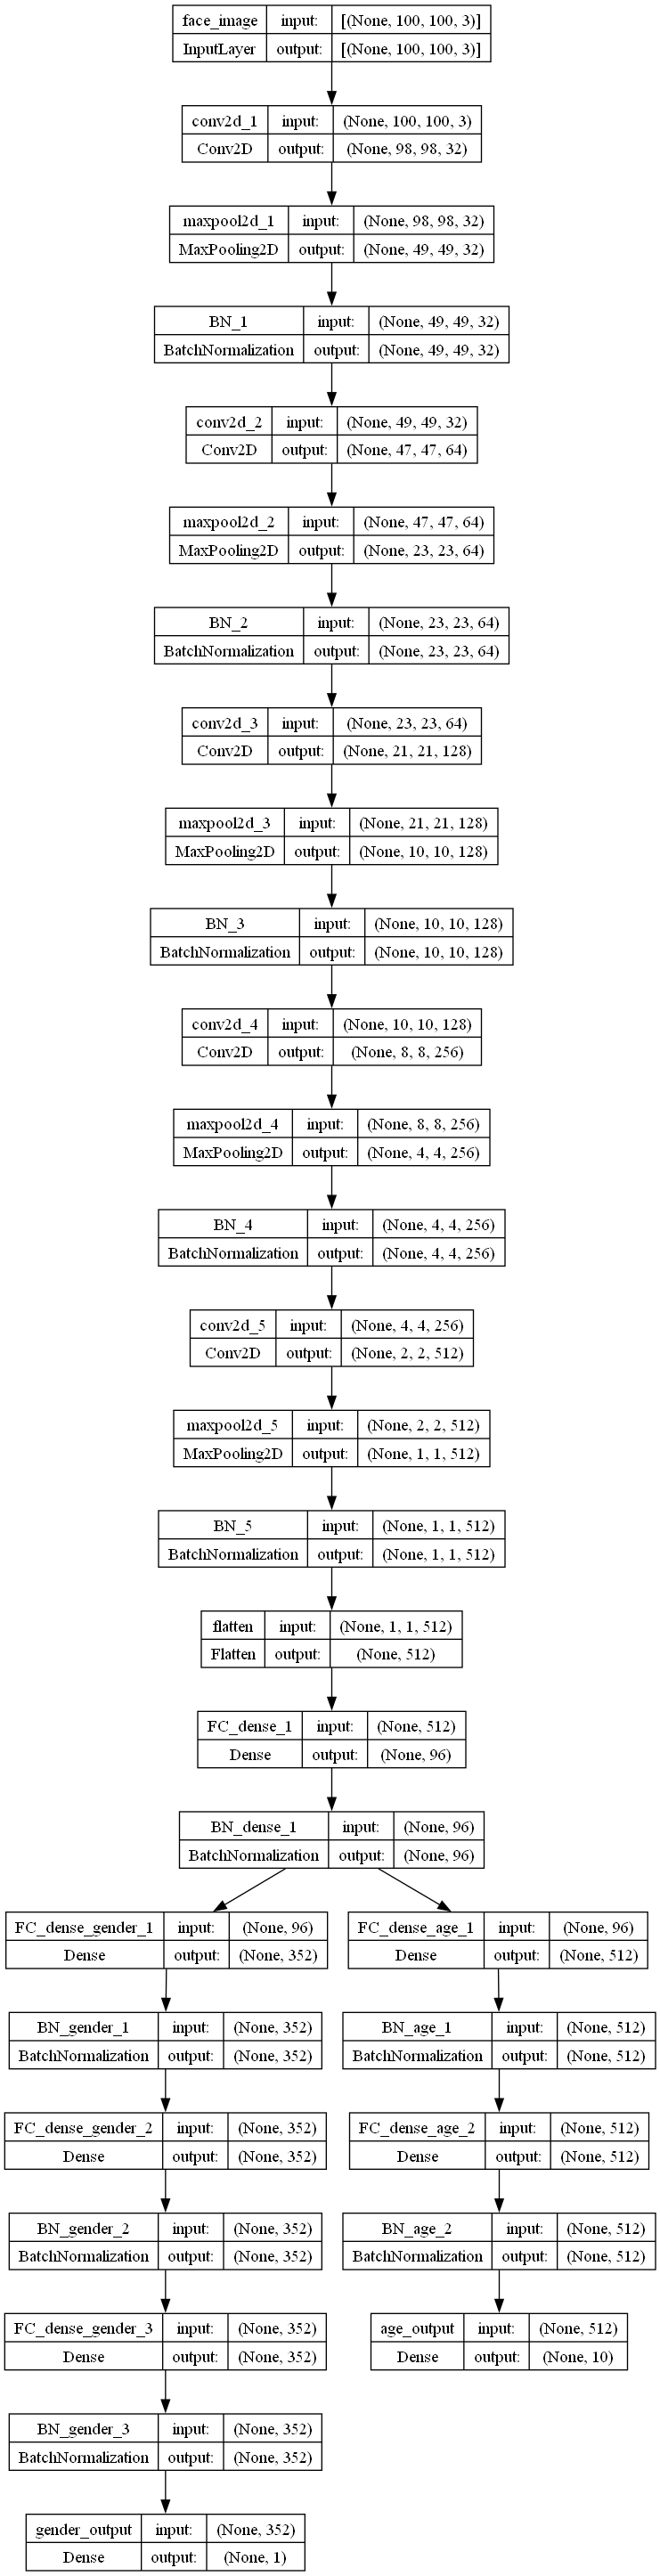

In [41]:

# Step 5: Retrieve the best hyperparameters
best_hps = tuner1.get_best_hyperparameters(num_trials=1)[0]
CNN_DLmodel_best_model = tuner1.hypermodel.build(best_hps)
plot_model(CNN_DLmodel_best_model, show_shapes=True)


In [32]:
tuner1.get_best_models(num_models=1)

Model: "DL_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 face_image (InputLayer)     [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 conv2d_1 (Conv2D)           (None, 98, 98, 32)           896       ['face_image[0][0]']          
                                                                                                  
 maxpool2d_1 (MaxPooling2D)  (None, 49, 49, 32)           0         ['conv2d_1[0][0]']            
                                                                                                  
 BN_1 (BatchNormalization)   (None, 49, 49, 32)           128       ['maxpool2d_1[0][0]']         
                                                                                           

In [34]:
tuner1.get_state()

{}

In [47]:
best_hps.values

{'hp_no_conv_layers': 5,
 'hp_no_FC_layer': 1,
 'hp_FC_neuron': 96,
 'hp_gender_FC_layer': 3,
 'hp_gender_neuron': 352,
 'hp_age_FC_layer': 2,
 'hp_age_neuron': 512,
 'tuner/epochs': 10,
 'tuner/initial_epoch': 4,
 'tuner/bracket': 1,
 'tuner/round': 1,
 'tuner/trial_id': '0021'}

In [22]:
print(f"""
The hyperparameter search is complete. The optimal learning rate is {best_hps.get('learning_rate')},
the optimal batch size is {best_hps.get('batch_size')}, and the optimal number of epochs is {best_hps.get('epochs')}.
""")

KeyError: 'learning_rate does not exist.'

In [23]:
print(CNN_DLmodel_best_model)
tuner1.results_summary()

Results summary
Results in d:\deep learning\project for deep learning\Gender_Age-group_classification_project/experiments/experiment_01/result//CNN_DLmodel_tuned\gender_age_model_turned
Showing 10 best trials
Objective(name="val_age_output_accuracy", direction="max")

Trial 0024 summary
Hyperparameters:
hp_no_conv_layers: 5
hp_no_FC_layer: 1
hp_FC_neuron: 96
hp_gender_FC_layer: 3
hp_gender_neuron: 352
hp_age_FC_layer: 2
hp_age_neuron: 512
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0021
Score: 0.44956353306770325

Trial 0025 summary
Hyperparameters:
hp_no_conv_layers: 4
hp_no_FC_layer: 4
hp_FC_neuron: 320
hp_gender_FC_layer: 2
hp_gender_neuron: 64
hp_age_FC_layer: 3
hp_age_neuron: 32
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0023
Score: 0.4473811686038971

Trial 0026 summary
Hyperparameters:
hp_no_conv_layers: 3
hp_no_FC_layer: 3
hp_FC_neuron: 192
hp_gender_FC_layer: 2
hp_gender_neuron: 480
hp_age

In [40]:
CNN_DLmodel_best_model.summary()
#plot_model(best_model, show_shapes=True)
save_turing_model_path=result_filepath+"/CNN_DLmodel_tuned"
CNN_DLmodel_best_model.save(save_turing_model_path+"/CNN_DLmodel_turned_model.h5",)


Model: "DL_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 face_image (InputLayer)     [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 conv2d_1 (Conv2D)           (None, 98, 98, 32)           896       ['face_image[0][0]']          
                                                                                                  
 maxpool2d_1 (MaxPooling2D)  (None, 49, 49, 32)           0         ['conv2d_1[0][0]']            
                                                                                                  
 BN_1 (BatchNormalization)   (None, 49, 49, 32)           128       ['maxpool2d_1[0][0]']         
                                                                                           

c:\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
